# Least-Square Regression

In this programming exercise, you will implement the least-square regression algorithm using only numpy. DO NOT use libraries like scikit-learn or scipy.

Use the template provided in this notebook to implement least-square regression and visualize the results.

When done, paste the code into the moodle-quiz.

In [1]:
# importing packages
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt

# Importing data

In [2]:
def load_data(name: str) -> tuple[ArrayLike, ArrayLike]:
    """Loads data from provided .npy files and returns the x and y values.

    Args:
        name (str): The file name of the .npy file to load.

    Returns:
        tuple[ArrayLike, ArrayLike]: The x and y values of the data. x and y have shape (n,).
    """
    data = np.load(name)
    x, y = data.T
    return x, y

# Plotting the data and the regression model.

In [ ]:
def plot(x: ArrayLike, y: ArrayLike, w: ArrayLike = None):
    """Plot the data and linear regression model.

    Only for plotting 2D data.

    Args:
        x (ArrayLike): The input data of shape (n,).
        y (ArrayLike): The output data of shape (n,).
        w (ArrayLike, optional): The weight and bias of a linear regression. Defaults to None.
    """

    # Plot the data
    plt.scatter(x, y, label='Data', color='blue')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend()
    plt.grid()

    # also plot the prediction
    if w is not None:
        x_range = np.linspace(np.min(x), np.max(x), 100)
        y_pred = w[0] * x_range + w[1]
        plt.plot(x_range, y_pred, color='red', label='Prediction')
        plt.legend()
    plt.show()

# Least-Squares Regression

In [ ]:
def regression(x: ArrayLike, y: ArrayLike) -> ArrayLike:
    """Calculates the linear least-squares regression coefficients.

    Args:
        x (ArrayLike): The input data of shape (n,).
        y (ArrayLike): The output data of shape (n,).

    Returns:
        ArrayLike: The linear regression coefficients.
    """

    # Implement least-squares regression
    w = None
    x, y = np.array(x), np.array(y) # ensure x and y are numpy arrays
    x_mean, y_mean = np.mean(x), np.mean(y) # calculate means
    x_diff, y_diff = x - x_mean, y - y_mean # calculate differences from means
    
    w_0 = np.sum(x_diff * y_diff) / np.sum(x_diff ** 2) # slope
    w_1 = y_mean - w_0 * x_mean # intercept

    w = np.array([w_0, w_1]) # combine slope and intercept into a single array

    return w

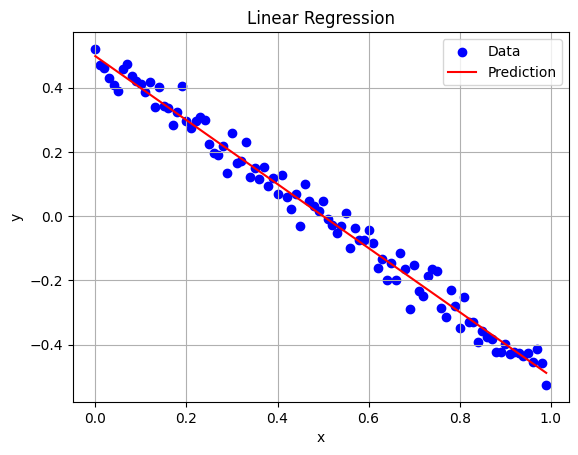

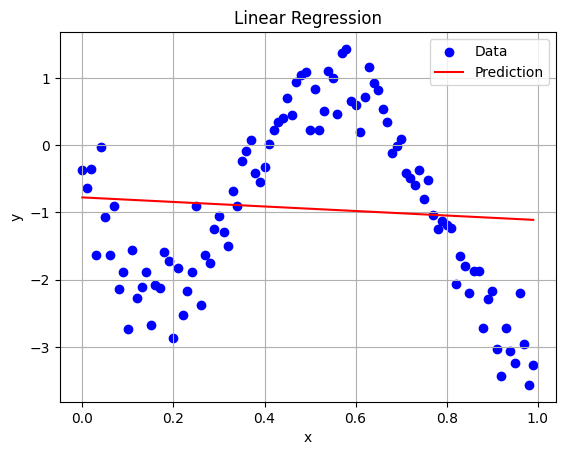

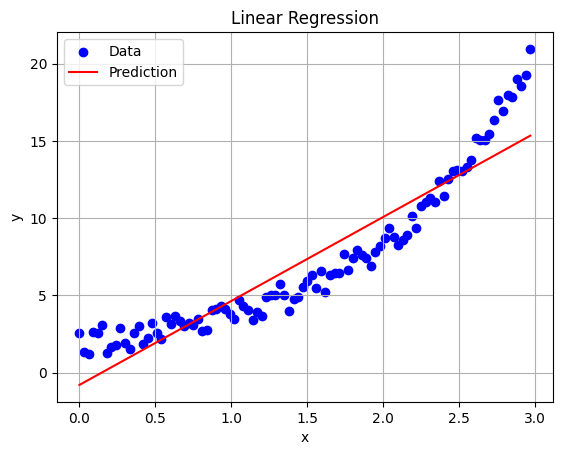

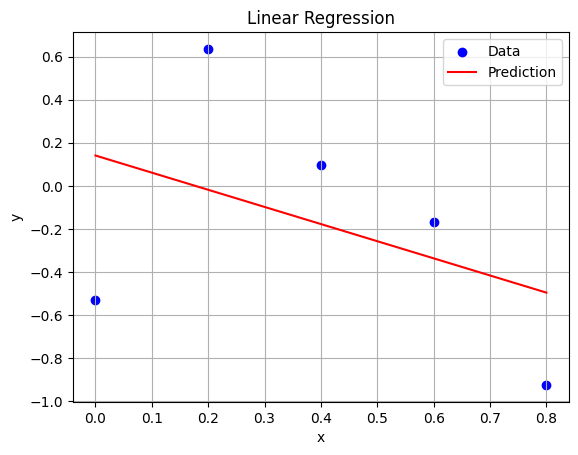

In [11]:
datasets = ["dataset0.npy", "dataset1.npy", "dataset2.npy", "dataset3.npy"]

for dataset in datasets:
    x, y = load_data(dataset)
    w = regression(x, y)
    plot(x, y, w)